In [14]:
from twitch import TwitchClient
import tweepy
import pandas as pd
import requests
import datetime
import numpy as np
import matplotlib.pyplot as plt
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret,twitch_client_id)

client = TwitchClient(client_id=twitch_client_id)
#channel = client.channels.get_by_id(44322889)
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())
currtime = datetime.datetime.now().strftime('%m/%d/%y')



In [2]:
client.games.get_top()

[{'game': {'name': 'Fortnite',
   'popularity': 246668,
   'id': 33214,
   'giantbomb_id': 37030,
   'box': {'large': 'https://static-cdn.jtvnw.net/ttv-boxart/Fortnite-272x380.jpg',
    'medium': 'https://static-cdn.jtvnw.net/ttv-boxart/Fortnite-136x190.jpg',
    'small': 'https://static-cdn.jtvnw.net/ttv-boxart/Fortnite-52x72.jpg',
    'template': 'https://static-cdn.jtvnw.net/ttv-boxart/Fortnite-{width}x{height}.jpg'},
   'logo': {'large': 'https://static-cdn.jtvnw.net/ttv-logoart/Fortnite-240x144.jpg',
    'medium': 'https://static-cdn.jtvnw.net/ttv-logoart/Fortnite-120x72.jpg',
    'small': 'https://static-cdn.jtvnw.net/ttv-logoart/Fortnite-60x36.jpg',
    'template': 'https://static-cdn.jtvnw.net/ttv-logoart/Fortnite-{width}x{height}.jpg'},
   'links': {},
   'localized_name': 'Fortnite',
   'locale': 'en-us'},
  'viewers': 248870,
  'channels': 13525},
 {'game': {'name': 'Counter-Strike: Global Offensive',
   'popularity': 70162,
   'id': 32399,
   'giantbomb_id': 36113,
   'box'

In [22]:
print(client.games.get_top()[0]['viewers'])

249521


In [3]:
#client.channels.get_by_id(15350)
#client.channels.get_videos(44322889)
#client.users.get_by_id(18)

In [6]:
games = len(client.games.get_top())
top_games = []
popularity = []
viewers = []
channels = []
for i in range(games):
    top_games.append(client.games.get_top()[i]['game']['name'])
    popularity.append(client.games.get_top()[i]['game']['popularity'])
    viewers.append(client.games.get_top()[i]['viewers'])
    channels.append(client.games.get_top()[i]['channels'])



df = pd.DataFrame({
    'Game' : top_games,
    'Popularity' : popularity,
    'Views': viewers,
    'Channels': channels
}
)

df


,Game,Popularity,Views,Channels
0,Counter-Strike: Global Offensive,328007,335679,1183
1,League of Legends,133766,141329,2244
2,Fortnite,115086,114289,11117
3,Marvel's Spider-Man,93843,95148,2484
4,IRL,70409,73906,1036
5,World of Warcraft,59027,59819,1909
6,PLAYERUNKNOWN'S BATTLEGROUNDS,45347,46708,1915
7,Hearthstone,36200,37004,292
8,Dota 2,27902,26363,543
9,Casino,27102,26155,77


In [39]:
response = requests.get('https://api.duckduckgo.com/?q=DuckDuckGo&format=json').json()
response

{'AbstractText': "DuckDuckGo is an Internet search engine that emphasizes protecting searchers' privacy and avoiding the filter bubble of personalized search results. DuckDuckGo distinguishes itself from other search engines by not profiling its users and by deliberately showing all users the same search results for a given search term, and emphasizes returning the best results, rather than the most results, generating those results from over 400 individual sources, including crowdsourced sites such as Wikipedia, and other search engines like Bing, Yahoo!, and Yandex.",
 'Results': [{'FirstURL': 'https://duckduckgo.com/',
   'Icon': {'Width': 16,
    'Height': 16,
    'URL': 'https://duckduckgo.com/i/duckduckgo.com.ico'},
   'Text': 'Official site',
   'Result': '<a href="https://duckduckgo.com/"><b>Official site</b></a><a href="https://duckduckgo.com/"></a>'}],
 'Redirect': '',
 'ImageWidth': 340,
 'ImageHeight': 270,
 'Type': 'A',
 'Infobox': {'content': [{'sort_order': '1',
    'lab

In [ ]:
https://contextualwebsearch.com/api/Search/WebSearchAPIWithPagination?q=[q]&pageNumber=[pageNumber]&pageSize=[pageSize]&autoCorrect=true

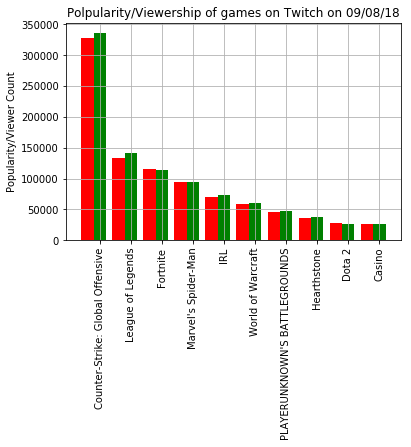

In [43]:
x = np.arange(len(df['Game']))
fig,ax = plt.subplots()

ax.bar(x -0.4 ,df['Popularity'],color='red',align='center',width = 0.4)
ax.bar(x,df['Views'],color='green',align='center',width = 0.4)
ax.set_xticks(x,df['Game'].tolist())
ax.set_ylabel('Popularity/Viewer Count')
ax.grid()
ax.set_title(f'Polpularity/Viewership of games on Twitch on {currtime}')
plt.xticks(x,df['Game'].tolist(), rotation=90)
plt.show()

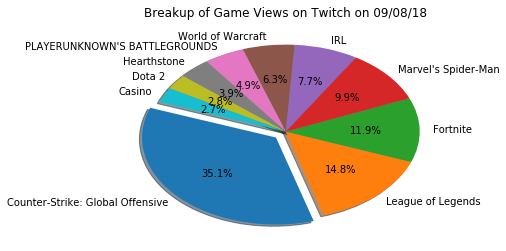

In [41]:
explode=[0.1,0,0,0,0,0,0,0,0,0]
plt.pie(df['Views'],labels=df['Game'].tolist(),shadow=True,startangle=160,explode=explode, autopct='%.1f%%')
plt.title(f'Breakup of Game Views on Twitch on {currtime}')
plt.show()

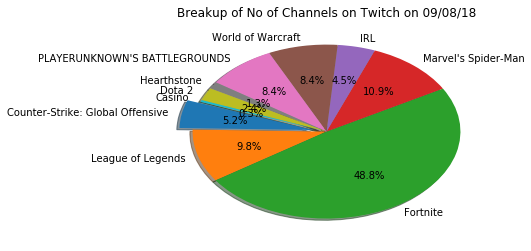

In [44]:
explode=[0.1,0,0,0,0,0,0,0,0,0]
plt.pie(df['Channels'],labels=df['Game'].tolist(),shadow=True,startangle=160,explode=explode, autopct='%.1f%%')
plt.title(f'Breakup of No of Channels on Twitch on {currtime}')
plt.show()